In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

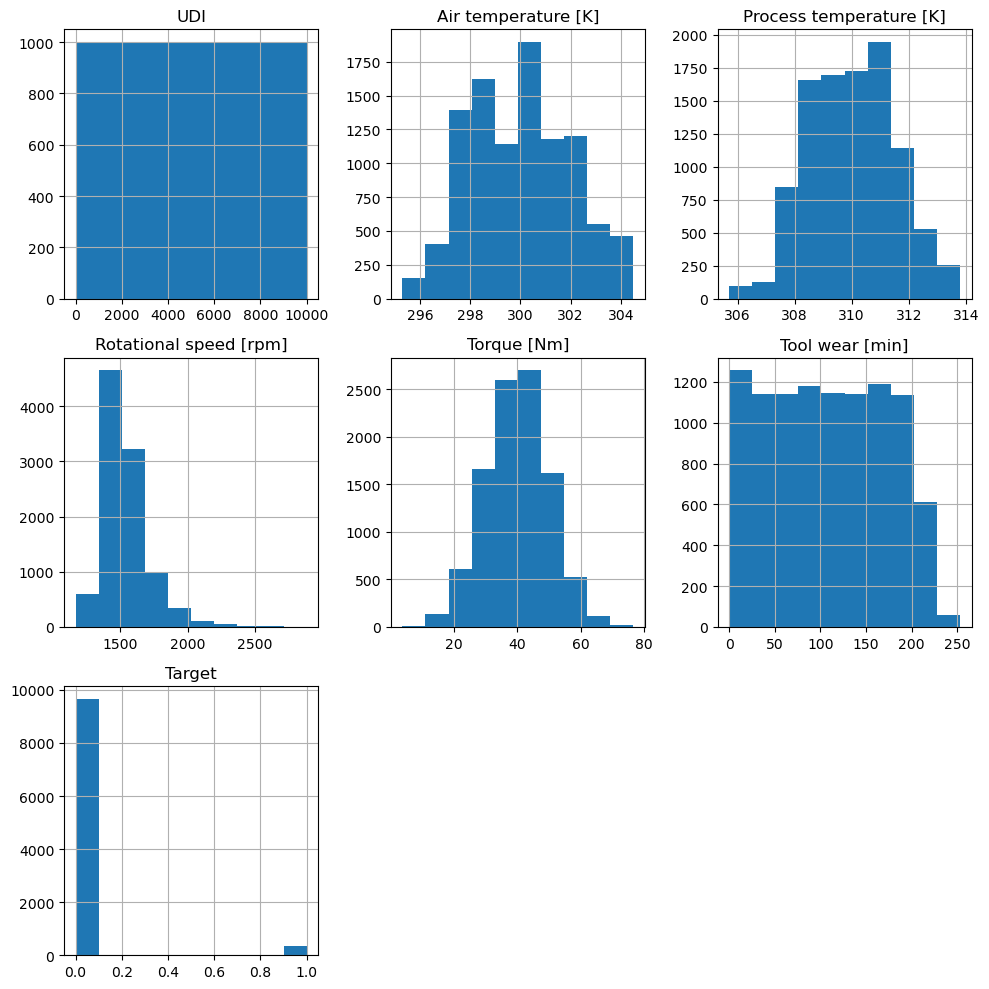

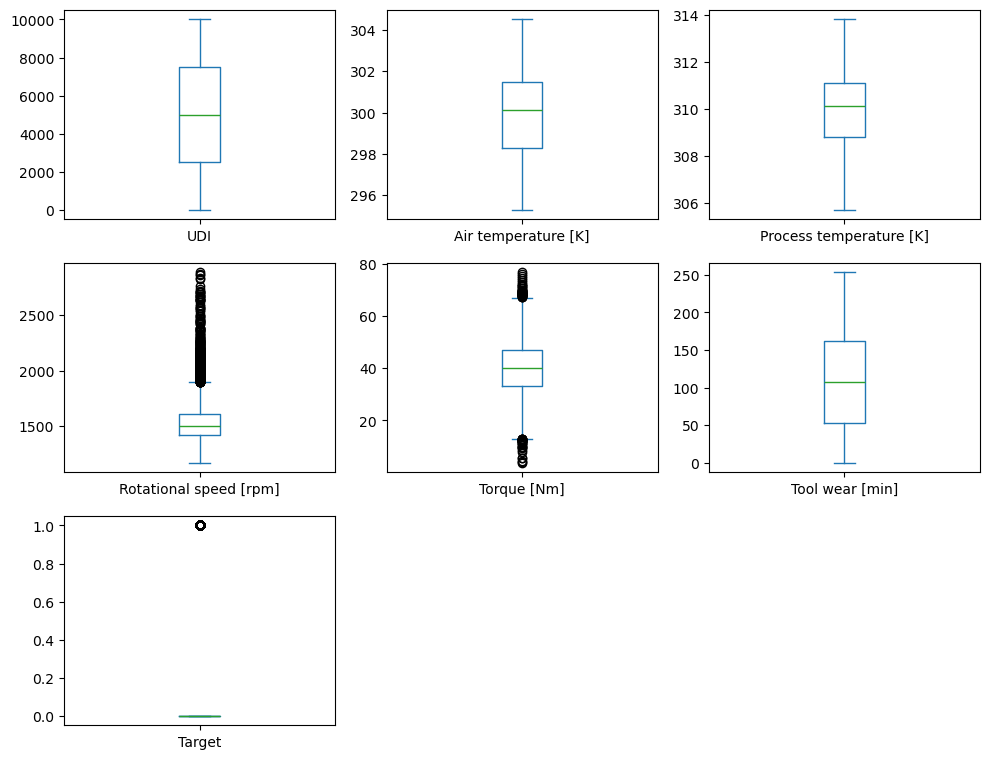

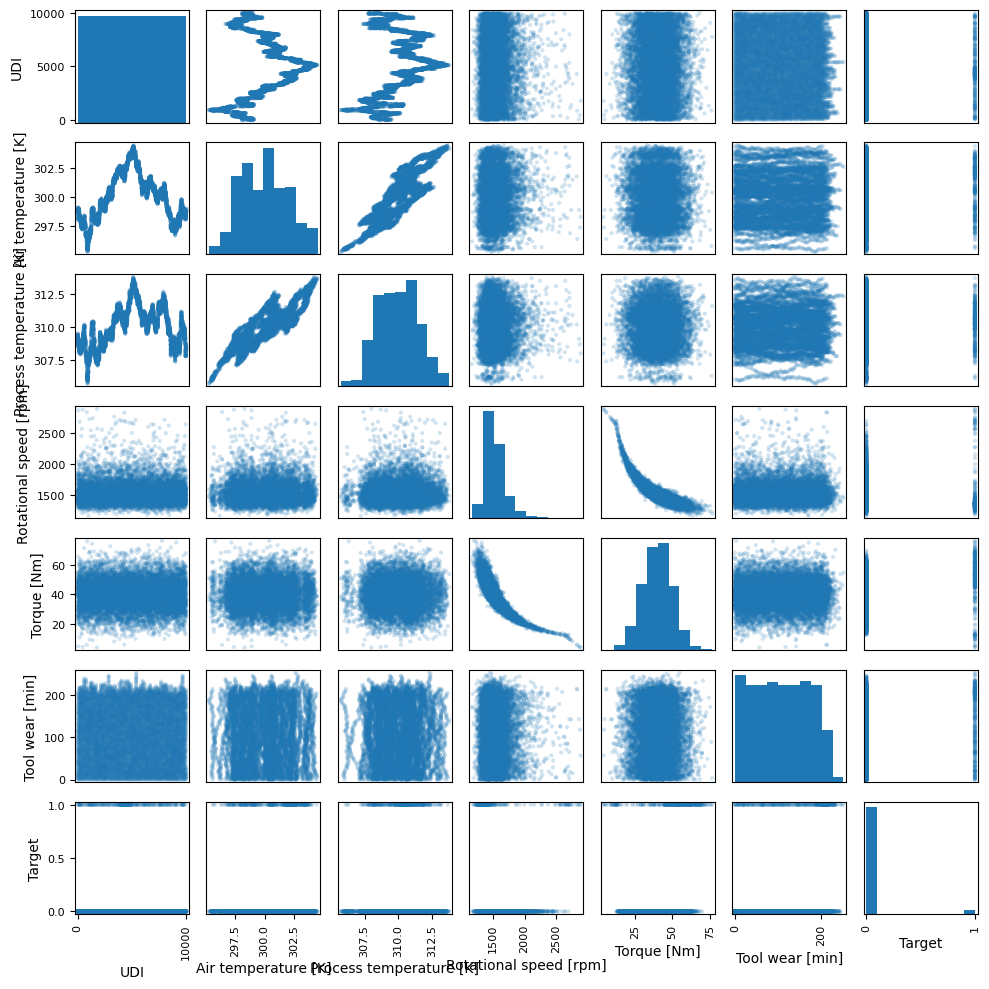

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('predictive_maintenance.csv')

# Histograms for each feature
df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

# Box plots for each feature
df.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(10,10))
plt.tight_layout()
plt.show()

# Scatter plot matrix
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(10, 10))
plt.tight_layout()
plt.show()

In [19]:
df = pd.read_csv('predictive_maintenance.csv')

In [20]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [22]:
df['Type'].nunique()

3

In [23]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

#Some Understandings : <br>
1. First we need to transform some columns by ordinal encoding/ label encoding<br>
2. There are no missing values<br>
3. `Type` Column has 3 types - L/M/H which is ordinal data , so apply ordinal encoding here<br>
The target variable here is `Target` only, i.e. to predict failure or not
4. Notice that, there are two output target variables `Target` and `Failure Type`<br> So prediect here multiclass Failure Type Variable<br>

5. This is a classification problem <br>

In [24]:
df[df['Target']==1]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,Power Failure
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,Power Failure
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure
...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,Tool Wear Failure
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,Power Failure
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,Overstrain Failure
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,Overstrain Failure


In [25]:
X = df.iloc[:,2:8]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)
y_train.shape

(7500,)

In [26]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['L', 'M', 'H']])
oe.fit(X_train[['Type']])
X_train['Type'] = oe.transform(X_train[['Type']]).astype(int)
X_test['Type'] = oe.transform(X_test[['Type']]).astype(int)

In [27]:
X_train.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
4901,1,303.6,312.3,1630,32.4,223
4375,0,302.0,309.7,1414,36.3,209
6698,0,301.6,310.8,1418,44.7,46
9805,0,298.4,309.2,1651,28.5,141
1101,2,296.7,307.5,1607,33.6,38


In [28]:
from sklearn.preprocessing import LabelEncoder
categories = ['No Failure', 'Heat Dissipation Failure', 'Power Failure', 'Overstrain Failure', 'Tool Wear Failure', 'Random Failures']
custom_encoder = {cat: i for i, cat in enumerate(categories)}
y_train_encoded = [custom_encoder.get(cat, len(categories)) for cat in y_train]
y_test_encoded = [custom_encoder.get(cat, len(categories)) for cat in y_test]
le = LabelEncoder()
le.fit(list(custom_encoder.values()))
y_train = le.transform(y_train_encoded)
y_test = le.transform(y_test_encoded)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

clf = LogisticRegression(solver='lbfgs', max_iter=10000)
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

log_train = round(clf.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 98.15 %
Model Accuracy Score : 98.08 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2424
           1       0.73      0.40      0.52        20
           2       0.86      0.78      0.82        23
           3       0.82      0.60      0.69        15
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         6

    accuracy                           0.98      2500
   macro avg       0.56      0.46      0.50      2500
weighted avg       0.97      0.98      0.98      2500

--------------------------------------------------------


c:\Users\gogin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\gogin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gogin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification

# Generate a sample dataset (replace with your actual dataset)
X, y = make_classification(n_samples=1000, n_features=6, random_state=42)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)

# Make predictions
y_pred_dec = decision.predict(X_test)

# Calculate accuracy
decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_test, y_pred_dec) * 100, 2)

# Print results
print("Training Accuracy    :", decision_train, "%")
print("Model Accuracy Score :", decision_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")


Training Accuracy    : 100.0 %
Model Accuracy Score : 88.0 %
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       112
           1       0.85      0.89      0.87        88

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

--------------------------------------------------------


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.52 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2424
           1       0.94      0.80      0.86        20
           2       0.86      0.78      0.82        23
           3       0.90      0.60      0.72        15
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         6

    accuracy                           0.99      2500
   macro avg       0.61      0.53      0.57      2500
weighted avg       0.98      0.99      0.98      2500

--------------------------------------------------------


c:\Users\Dhruv\OneDrive\Desktop\PREDICTIVE MAINTAINENCE USING ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dhruv\OneDrive\Desktop\PREDICTIVE MAINTAINENCE USING ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dhruv\OneDrive\Desktop\PREDICTIVE MAINTAINENCE USING ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [ ]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 96.49 %
Model Accuracy Score : 97.04 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2424
           1       0.00      0.00      0.00        20
           2       1.00      0.09      0.16        23
           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         6

    accuracy                           0.97      2500
   macro avg       0.33      0.18      0.19      2500
weighted avg       0.95      0.97      0.96      2500

--------------------------------------------------------


c:\Users\Dhruv\OneDrive\Desktop\PREDICTIVE MAINTAINENCE USING ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dhruv\OneDrive\Desktop\PREDICTIVE MAINTAINENCE USING ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dhruv\OneDrive\Desktop\PREDICTIVE MAINTAINENCE USING ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [ ]:
import pickle
pickle.dump(random_forest,open('model.pkl','wb'))

In [ ]:
import joblib

# Assuming you have 'random_forest' as your trained model
joblib.dump(random_forest, 'model.joblib')

['model.joblib']

In [ ]:
import joblib

# Assuming you have 'random_forest' as your trained model
joblib.dump(random_forest, 'rfc_smote_1.joblib')

['rfc_smote_1.joblib']

In [ ]:
columns = df.columns.tolist()
columns

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target',
 'Failure Type']

In [4]:
import numpy as np
import pandas as pd

# Count the number of failure (1) and non-failure (0) cases
print("Class Distribution:")
print(pd.Series(y_train).value_counts())


Class Distribution:
1    409
0    391
Name: count, dtype: int64


In [5]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("New class distribution:")
print(pd.Series(y_train_resampled).value_counts())


New class distribution:
0    409
1    409
Name: count, dtype: int64


c:\Users\gogin\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [7]:
probs = rfc.predict_proba(X_test)
print("Sample Probabilities:\n", probs[:10])


Sample Probabilities:
 [[0.88 0.12]
 [0.6  0.4 ]
 [0.73 0.27]
 [0.24 0.76]
 [0.94 0.06]
 [0.98 0.02]
 [0.01 0.99]
 [0.03 0.97]
 [0.67 0.33]
 [0.58 0.42]]


In [8]:
threshold = 0.6  # Adjust between 0.5 to 0.7
y_pred_custom = (rfc.predict_proba(X_test)[:, 1] > threshold).astype(int)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))


Accuracy: 0.88


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import joblib

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=6, random_state=42)

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a new RandomForest model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Save the model
joblib.dump(rfc, "model.joblib")

print("✅ Model retrained and saved successfully!")


✅ Model retrained and saved successfully!
